In [382]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [383]:
data = pd.read_csv(f'../app/data/munged_data.csv')
data.drop(['location','dateposted'],inplace=True,axis=1)

In [384]:
data

,company,rating,job_title,text,salary,state,city
0,online technical services,3.7,data scientist - marketing,"job descriptiondata scientist, marketingsan di...",147500.0,remote,remote
1,west cap,3.5,"data scientist, botguard",human was founded in 2012 in a brooklyn sci-fi...,114144.0,ny,remote in new york
2,maya ai inc.,0.0,data scientist,our maya team is expanding and we are looking ...,130588.0,remote,remote
3,recurrent,0.0,data scientist,what's the opportunity?recurrent is on a missi...,119151.0,wa,remote in seattle
4,fractal.ai,0.0,data scientist,fractal analytics is a strategic ai partner to...,137174.0,ny,remote in new york
...,...,...,...,...,...,...,...
1021,directv,3.7,senior director of data science,"at directv, we’re connecting the world through...",253900.0,ca,remote in el segundo
1022,cybercoders,3.7,principal data scientist,principal data scientist if you are a p...,175000.0,wa,remote in seattle
1023,integration developer network llc,0.0,data scientist,machine learning engineer24+ monthsclient 7-el...,150171.0,remote,remote
1024,cybercoders,3.7,remote lead machine learning engineer,remote lead machine learning engineer i...,162500.0,pa,remote in pittsburgh


In [385]:
data[['company','job_title','text']] = data[['company','job_title','text']].astype(str)

In [386]:
cols = ['company', 'job_title', 'salary', 'state', 'city']
for i in cols:
    print(i)
    print(data[i].value_counts(),'\n')


company
sparkcognition                       80
ericsson                             50
comcentric                           45
cybercoders                          45
target                               39
revel                                39
s&p global                           39
integration developer network llc    39
nthrive                              39
recruiting from scratch              37
california fair plan association     32
optum                                32
etsy                                 30
online technical services            22
redfin                               22
west cap                             22
ford motor company                   22
maya ai inc.                         22
coderpad, inc.                       22
techtrueup                           22
recurrent                            22
humana                               19
scruff                               18
unitedhealth group                   17
datastream insurance            

In [387]:
## encoding
cols = ['company','job_title', 'state', 'city']

encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encodered_data = pd.DataFrame(encoder.fit_transform(df[cols]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df = data.join(encodered_data)
final_df.drop(cols, axis=1, inplace=True)

#view final df
final_df

,rating,text,salary,0,1,2,3,4,5,6,...,159,160,161,162,163,164,165,166,167,168
0,3.7,"job descriptiondata scientist, marketingsan di...",147500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.5,human was founded in 2012 in a brooklyn sci-fi...,114144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,our maya team is expanding and we are looking ...,130588.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,what's the opportunity?recurrent is on a missi...,119151.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,fractal analytics is a strategic ai partner to...,137174.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,3.7,"at directv, we’re connecting the world through...",253900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1022,3.7,principal data scientist if you are a p...,175000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1023,0.0,machine learning engineer24+ monthsclient 7-el...,150171.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1024,3.7,remote lead machine learning engineer i...,162500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [388]:
encodered_data

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [389]:
from sklearn.preprocessing import StandardScaler

 
# read in data 

cols = ['rating','salary']
# normalize data 

scaler = StandardScaler()

final_df

,rating,text,salary,0,1,2,3,4,5,6,...,159,160,161,162,163,164,165,166,167,168
0,3.7,"job descriptiondata scientist, marketingsan di...",147500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.5,human was founded in 2012 in a brooklyn sci-fi...,114144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,our maya team is expanding and we are looking ...,130588.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,what's the opportunity?recurrent is on a missi...,119151.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,fractal analytics is a strategic ai partner to...,137174.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,3.7,"at directv, we’re connecting the world through...",253900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1022,3.7,principal data scientist if you are a p...,175000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1023,0.0,machine learning engineer24+ monthsclient 7-el...,150171.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1024,3.7,remote lead machine learning engineer i...,162500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [390]:
standardized_data = pd.DataFrame(scaler.fit_transform(final_df[cols]))


In [391]:
standardized_data.rename(columns = {0:'rating', 
                       1:'salary'}, inplace = True)

In [392]:
standardized_data

,rating,salary
0,0.649439,-0.274455
1,0.535877,-0.519643
2,-1.451457,-0.398769
3,-1.451457,-0.482839
4,-1.451457,-0.350358
...,...,...
1021,0.649439,0.507654
1022,0.649439,-0.072312
1023,-1.451457,-0.254822
1024,0.649439,-0.164196


In [393]:

#final_df = final_df.join(standardized_data)
final_df.drop(cols, axis=1, inplace=True)
final_df = final_df.join(standardized_data)



final_df
#final_df.drop(cols, axis=1, inplace=True)

,text,0,1,2,3,4,5,6,7,8,...,161,162,163,164,165,166,167,168,rating,salary
0,"job descriptiondata scientist, marketingsan di...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.649439,-0.274455
1,human was founded in 2012 in a brooklyn sci-fi...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.535877,-0.519643
2,our maya team is expanding and we are looking ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.451457,-0.398769
3,what's the opportunity?recurrent is on a missi...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.451457,-0.482839
4,fractal analytics is a strategic ai partner to...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.451457,-0.350358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,"at directv, we’re connecting the world through...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.649439,0.507654
1022,principal data scientist if you are a p...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.649439,-0.072312
1023,machine learning engineer24+ monthsclient 7-el...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.451457,-0.254822
1024,remote lead machine learning engineer i...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.649439,-0.164196


In [394]:
standardized_data

,rating,salary
0,0.649439,-0.274455
1,0.535877,-0.519643
2,-1.451457,-0.398769
3,-1.451457,-0.482839
4,-1.451457,-0.350358
...,...,...
1021,0.649439,0.507654
1022,0.649439,-0.072312
1023,-1.451457,-0.254822
1024,0.649439,-0.164196


In [395]:
data[cols][:l]

,rating,salary
0,3.7,147500.0
1,3.5,114144.0
2,0.0,130588.0
3,0.0,119151.0
4,0.0,137174.0
5,3.8,135571.0
6,4.1,NaN
7,3.4,109500.0
8,4.4,117148.0
9,4.4,132167.0


<AxesSubplot:xlabel='rating', ylabel='Count'>

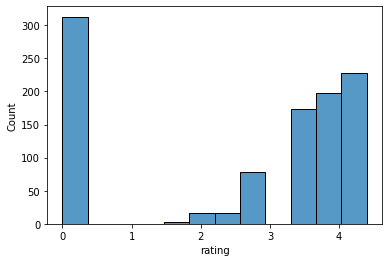

In [396]:
import seaborn as sns
sns.histplot(data.rating)

<AxesSubplot:xlabel='salary', ylabel='Count'>

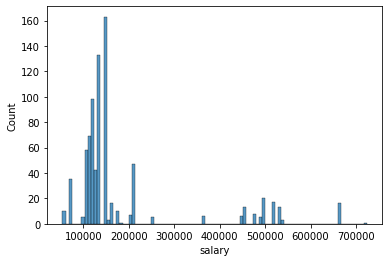

In [397]:
sns.histplot(data.salary)

In [403]:
sum(final_df.loc()[0][1:])

4.374983970086181

In [406]:
final_df

,text,0,1,2,3,4,5,6,7,8,...,161,162,163,164,165,166,167,168,rating,salary
0,"job descriptiondata scientist, marketingsan di...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.649439,-0.274455
1,human was founded in 2012 in a brooklyn sci-fi...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.535877,-0.519643
2,our maya team is expanding and we are looking ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.451457,-0.398769
3,what's the opportunity?recurrent is on a missi...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.451457,-0.482839
4,fractal analytics is a strategic ai partner to...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.451457,-0.350358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,"at directv, we’re connecting the world through...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.649439,0.507654
1022,principal data scientist if you are a p...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.649439,-0.072312
1023,machine learning engineer24+ monthsclient 7-el...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.451457,-0.254822
1024,remote lead machine learning engineer i...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.649439,-0.164196


In [407]:
final_df.to_csv('../app/data/processed_data.csv', index= False)